# FUNDAMENTOS DE ROBÓTICA MÓVIL 

## TP°3: Mediciones de sensor de barrido láser.

### Profesores:
#### Gonzalo Perez Paina
#### David Gaydou
#### Diego Gonzalez Dondo

### Alumnos:
#### Escobar Daniela   72705

## Objetivo

#### Analizar mediciones de un sensor de barrido láser y la relación entre los sistemas de coordenadas del sensor/robot y del entorno, utilizando para ello el simulador Gazebo.



## Descripción de la actividad
#### Las actividades se deben realizar, utilizando el simulador Gazebo con el modelo de simulación del robot RoMAA-II 1 bajo el entorno ROS Development Studio 2 (ROSDS) puesto en marcha en el trabajo práctico Nro. 1.
#### La figura 1 muestra una captura de pantalla del entorno ROSDS con el simulador Gazebo en ejecución, el robot RoMAA-II y el escenario donde opera el robot.

## Resolución de actividades:

### 1. Ejecutar el simulador del robot RoMAA utilizando la herramienta roslaunch.

> roslaunch romaa_gazebo construction.launch


> ROMAA_LASER=1 roslaunch romaa_gazebo spawn_xacro.launch

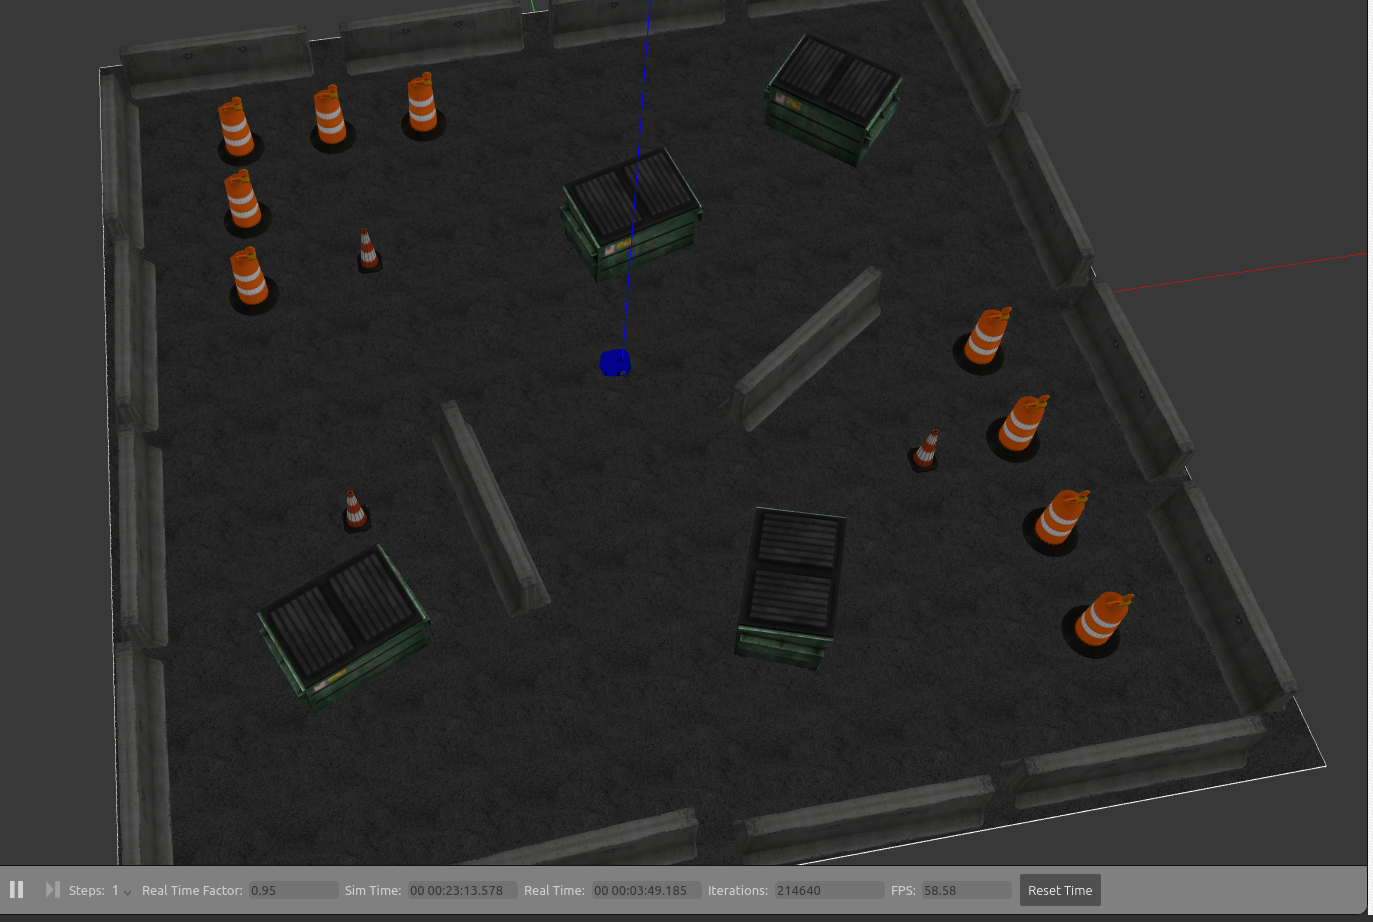

### 2. Ejecutar la herramienta de registro de datos:

### 3. Mover el robot utilizando el teclado intentando abarcar la mayor parte del escenario de trabajo del robot. Luego detener el registro de datos y los demás programas ejecutados.

### 4. Descargar y construir el paquete de ROS para la conversión de datos. 

> git clone https://github.com/ciiiutnfrc/rosbag2txt.git

### 5. Convertir los datos mediante el comando:
 > roslaunch rosbag2txt rosbag2txt.launch bagfile:=<bagfile>

Se crean dos archivos de texto (odom.txt y scan.txt) con los datos de odometrı́a y sensor de
barrido láser cuyo formato se explicó en la sección anterior. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from io import StringIO

pd.set_option('display.max_rows',8)
file_key = 'odom(1).txt'
df = pd.read_csv(file_key, header = None, delim_whitespace=True)
df.columns = ['time', 'posX', 'posY', 'posang', 'vel', 'velAngular']
df[:10]

time     posX     posY   posang      vel  velAngular
0   1322.317 -0.03280  0.00168 -0.05547  0.00049     0.00044
1   1322.357 -0.03282  0.00168 -0.05549 -0.00073    -0.00188
2   1322.397 -0.03283  0.00168 -0.05551 -0.00012     0.00046
3   1322.437 -0.03284  0.00168 -0.05552 -0.00022    -0.00060
..       ...      ...      ...      ...      ...         ...
6   1322.557 -0.03287  0.00169 -0.05558 -0.00068    -0.00130
7   1322.597 -0.03289  0.00169 -0.05560 -0.00052    -0.00159
8   1322.637 -0.03290  0.00169 -0.05562  0.00008     0.00163
9   1322.677 -0.03291  0.00169 -0.05563 -0.00089    -0.00173

[10 rows x 6 columns]

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

pd.set_option('display.max_rows',8)
file_key = 'scan(1).txt'
df = pd.read_csv(file_key, header = None, delim_whitespace=True)


df[:10]


0        1        2        3        4        5        6        7    \
0   1322.363  3.88082  3.87779  3.93163  3.91554  3.93520  3.94992  3.99844   
1   1322.463  3.86276  3.88031  3.92417  3.93802  3.95455  3.97354  3.99363   
2   1322.562  3.87832  3.87223  3.89537  3.94599  3.95152  3.97320  3.99072   
3   1322.663  3.85401  3.88615  3.92119  3.92748  3.94196  3.97087  3.98498   
..       ...      ...      ...      ...      ...      ...      ...      ...   
6   1322.963  3.87404  3.89078  3.91548  3.92730  3.93503  3.97432  3.98370   
7   1323.063  3.87977  3.88907  3.93171  3.94720  3.94440  3.97713  3.99104   
8   1323.163  3.87705  3.88083  3.91704  3.92853  3.96830  3.98592  3.99906   
9   1323.263  3.87862  3.89794  3.91126  3.95807  3.97215  3.97537  3.99468   

        8        9    ...      531  532  533  534  535  536  537  538  539  \
0   4.02962  4.05619  ...  8.52788  inf  inf  inf  inf  inf  inf  inf  inf   
1   4.00308  4.04995  ...  8.52308  inf  inf  inf  inf  inf  inf  inf  inf   
2   4.01505  4.05489  ...  8.53973  inf  inf  inf  inf  inf  inf  inf  inf   
3   4.02651  4.02034  ...  8.53705  inf  inf  inf  inf  inf  inf  inf  inf   
..      ...      ...  ...      ...  ...  ...  ...  ...  ...  ...  ...  ...   
6   4.03703  4.05489  ...  8.51371  inf  inf  inf  inf  inf  inf  inf  inf   
7   4.01441  4.04197  ...  8.52236  inf  inf  inf  inf  inf  inf  inf  inf   
8   4.00059  4.06027  ...  8.52496  inf  inf  inf  inf  inf  inf  inf  inf   
9   4.02466  4.04341  ...  8.51331  inf  inf  inf  inf  inf  inf  inf  inf   

    540  
0   inf  
1   inf  
2   inf  
3   inf  
..  ...  
6   inf  
7   inf  
8   inf  
9   inf  

[10 rows x 541 columns]

## Análisis de los datos:

### 6. Escribir un script en Python que cargue los datos del archivo scan.txt y genere gráficos en coordenadas polares de 3 barridos del sensor láser distribuidos de forma uniforme en el tiempo de simulación.

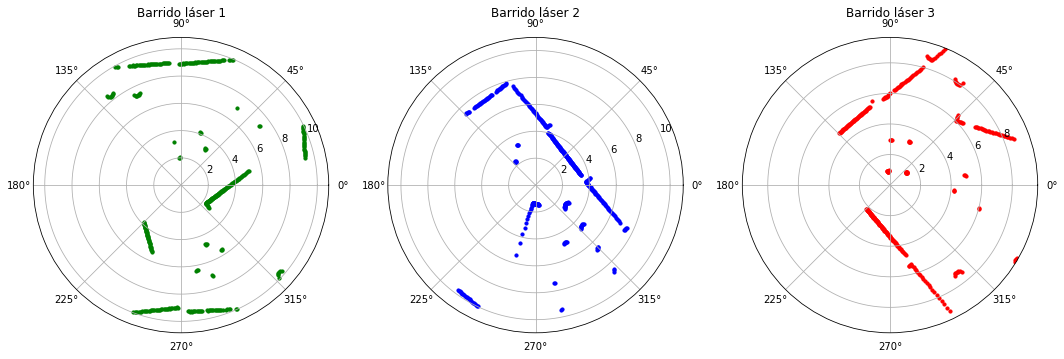

In [12]:
import numpy as np
from matplotlib import pyplot as plt
file = 'scan(1).txt'
dist = []
r1 = []
r2 = []
r3 = []

tiempo= np.genfromtxt(file, usecols = 0, dtype=float) 
for index in range(540):
    dist.append(np.genfromtxt(file, usecols = (index+1), dtype=float))
ang=np.radians(np.linspace(-135,134.5,540))

## Plot2 del scan laser ##
for value in dist:     
   r1.append(value[20])

for value in dist:     
   r2.append(value[200])
for value in dist:     
   r3.append(value[2000])


fig = plt.figure(figsize=(18, 8))
ax1 = plt.subplot(131, projection='polar')
ax2 = plt.subplot(132, projection='polar')
ax3 = plt.subplot(133, projection='polar')


ax1.scatter(ang,r1, s = 10, c = 'green')
ax1.set_title('Barrido láser 1')

ax2.scatter(ang,r2, s = 10, c = 'blue')
ax2.set_title("Barrido láser 2")

ax3.scatter(ang,r3, s = 10, c = 'red')
ax3.set_title("Barrido láser 3")

                 
plt.show()



A partir de los graficos anteriores, vemos que en el rango de los $135^\circ$ hasta los $225^\circ$ no hay ninguna medición; esto se debe a las especificaciones del láser, además solo puede medir en el siguiente rango $0.1m<\zeta<10m$.

### 7. Suponiendo que los valores de timestamp de las mediciones de odometrı́a y del sensor de barrido láser se encuentran almacenados en arreglos unidimensionales. Diseñar un algoritmo que determine los índices del vector de timestamp de odometrı́a que se encuentren más próximos a los valores del vector de timestamp de las mediciones del láser.

Como es usual, la tasa de muestreo de las mediciones de odometrı́a y del sensor láser son diferentes y por lo tanto los timestamps no coinciden. 
Esto sucede en los datos obtenidos de las simulaciones anteriores, donde la tasa de medición de odometrı́a es mayor que el del sensor de barrido láser, por lo que pide diseñar un algoritmo que determine los ı́ndices del vector de timestamp de odometrı́a que se encuentren más próximos a los valores del vector de timestamp de las mediciones
del sensor.

### 8. Mostrar en una gráfica los instantes de tiempo (timestamp) de las mediciones del sensor de barrido láser y de odometrı́a. Resaltar aquellos instantes de tiempo de mediciones de odometrı́a más próximas a las del sensor de barrido láser. Mostrar solo una fracción del tiempo total de simulación.

En la figura siguiente se muestran los instantes de tiempo de las mediciones del sensor de barrido láser y de odometrı́a.
Se comprueba que no todos los barridos del láser coinciden en tiempo con alguna muestra de la odometrı́a

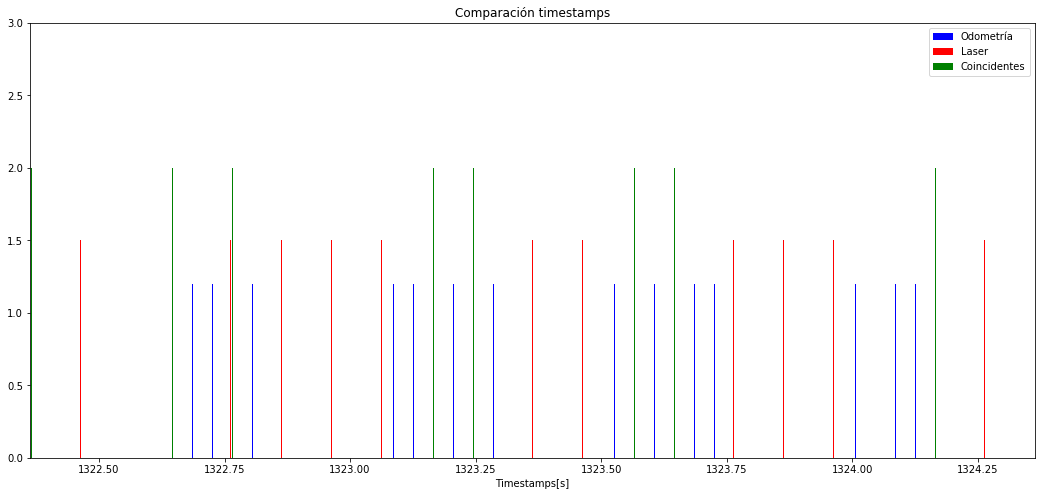

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Scandata = pd.read_csv("scan(1).txt", sep= "\t",header=None, index_col = None) 
Scandata = Scandata.replace(np.inf,10) #El inf lo reemplazo por el valor máxima 

puntos  =[]
puntos.append(Scandata.loc[0,1:])
puntos.append(Scandata.loc[len(Scandata)//2,1:])
puntos.append(Scandata.loc[len(Scandata)-1,1:])
def encontrar_valorCercano(valor,df):
    return (df[0].sub(valor).abs().idxmin())
    
Odomdata = pd.read_csv("odom.txt", sep= "\t",header=None, index_col = None) 
near_i = []

for timestamp in Scandata[0]:
    near_i.append( encontrar_valorCercano(timestamp,Odomdata))

near_i = np.array(near_i)
N=20
plt.figure(figsize=(18, 8))
plt.title("Comparación timestamps")
plt.xlabel('Timestamps[s]')

plt.xlim(Scandata[0][0], Scandata[0][N])
plt.ylim(0,3)

plt.bar(Odomdata[0][0:near_i[N]],1.2*np.ones(near_i[N]),
         linestyle=":", color = "blue", width = 0.001,
         label = "Odometría")
         
plt.bar(Scandata[0][0:N],np.ones(N)*1.5,linestyle="-.", color = "red", width = 0.001, 
         label = "Laser" )         

plt.bar(Odomdata[0][near_i[(near_i < near_i[N])]], # N puntos de laser que corresponden 
        2*np.ones(N),linestyle="--",  # con los N puntos de cercania
       color = "green", width = 0.001, label = "Coincidentes")


plt.legend()


## 9. Escribir un script que genere una gráfica del mapa.

1.  Convertir las mediciones del barrido láser de coordenadas polares a rectangulares.
2. Transformar los puntos de medición del sensor láser al sistema de coordenadas de odometrı́a y graficar.
3. Graficar junto al mapa el camino seguido por el robot.

El script permite relevar el mapa del escenario utilizado junto con el recorrido que se hizo para la obtención de datos. 

Text(0.5, 1.0, 'Mapa con recorrido')

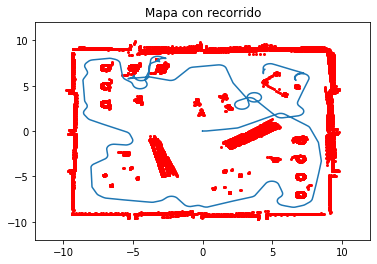

In [8]:
import control 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd


file1 = 'scan(1).txt'
file2 = 'odom(1).txt'


tiempo= np.genfromtxt(file2, usecols = 0, dtype=float) 
posX= np.genfromtxt(file2, usecols = 1, dtype=float) 
posY= np.genfromtxt(file2, usecols = 2, dtype=float) 
posang= np.genfromtxt(file2, usecols = 3, dtype=float) 


scan_time= np.genfromtxt(file1, usecols = 0, dtype=float) 
scan=pd.read_csv(file1, header=None, delim_whitespace=True)


r=tiempo [0]
scan_time [:]=scan_time [:]-r
tiempo=tiempo-r
num=np.searchsorted(tiempo [:],scan_time [:],side='left', sorter=None)


for i in range (540):
    if(tiempo [num[i]]-scan_time [i]>abs(tiempo [num[i]-1]-scan_time [i])):
        num[i]=num[i]-1

ang=np.zeros([540])
ang[:]=range(-270,270)
ang=np.radians(ang[:]/2)


r=np.array([scan.iloc[0,1:]])
x=r*np.cos(ang-posang[num[0]])-posX [num[0]]
y=r*np.sin(ang-posang [num[0]])-posY [num[0]]
g=plt.plot(x,y,'ro', markersize=2)

for i in range(1,2040,20):
     ra=np.array([scan.iloc[i,1:]])
     x=ra*np.cos(ang+posang [num[i]])+posX [num[i]]
     y=ra*np.sin(ang+posang [num[i]])+posY [num[i]]
     g+=plt.plot(x,y,'ro', markersize=2)

g+=plt.plot(posX,posY)
plt.ylim(-12,12)
plt.xlim(-12,12)
plt.title('Mapa con recorrido')


## Conclusión:

En este trabajo se utilizó la herramienta de simulación Gazebo, se obtuvieron datos de odometrı́a de la simulación del robot en un espacio con obstáculos, ası́ como también los datos de scaneo láser que van desde los $135^\circ$ a los $225^\circ$ implementado en el robot.

Se realizaron gráficos de los barridos del láser en distintos tiempos graficadas en un diagrama polar, que muestran los ángulos para los cuáles el láser incidió en una superficie a una determinada distancia menor a 10m y mayor a 0.10m.

Además se pudo observar a través de los gráficos que el tiempo de cada barrido láser no coincide exactamente con las muestras de odometrı́a. Se puede concluir que que existen muestras de cada caso que se encuentran más cercanas entre ellas, las cuales se usaron para asociar barridos del láser con determinada pose del robot.

En el último punto además, al mostrar el recorrido del robot se pueden ver todos los puntos que el láser obtuvo en dicho recorrido, mostrando el espacio completo, donde se pueden divisar paredes y obstáculos como los conos,etc . 
